In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [14]:
!nvidia-smi
!nvcc --version

Fri Mar  7 16:07:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080      WDDM  |   00000000:26:00.0  On |                  N/A |
|  0%   44C    P8             13W /  320W |    1713MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
'''!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.7.0.dev20250305+cu128
Uninstalling torch-2.7.0.dev20250305+cu128:
  Successfully uninstalled torch-2.7.0.dev20250305+cu128
Found existing installation: torchvision 0.22.0.dev20250306+cu128
Uninstalling torchvision-0.22.0.dev20250306+cu128:
  Successfully uninstalled torchvision-0.22.0.dev20250306+cu128


In [ ]:
'''% !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 6.2/6.2 MB 94.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 120.1 MB/s eta 0:00:21
    --------------------------------------- 0.0/2.5 GB 115.8 MB/s eta 0:00:22
   - -------------------------------------- 0.1/2.5 GB 116.2 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 118.5 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 118.5 MB/s eta 0:00:21
   -- ------------------------------------- 0.1/2.5 GB 118.4 MB/s eta 0:00:20
   -- ------------------------------------- 0.2/2.5 GB 118.4 MB/s eta 0:00:20
   --- ------------------------------------ 0.2/2.5 GB 118.4 MB/s eta 0:00:20
   --- ------------------------------------ 0.2/2.5 GB 117.5 MB/s eta 0:00:20
   --- -------------

In [15]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

1
NVIDIA GeForce RTX 4080
True


In [ ]:
!pip install seaborn
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------  11.0/11.1 MB 57.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 49.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -------- ------------------------------- 8.7/40.9 MB 41.3 MB/s eta 0:00:01
   ----------------- ---------------------- 18.4/40.9 MB 42.9 MB/s eta 0:00:01
   -------------------------- ------------- 27.0/40.9 MB 42.8 MB/s eta 0:00:01
   ----------------------------------- ---- 36.4/40.9 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 40.0 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


C:\Users\smuht\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\smuht\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\smuht\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

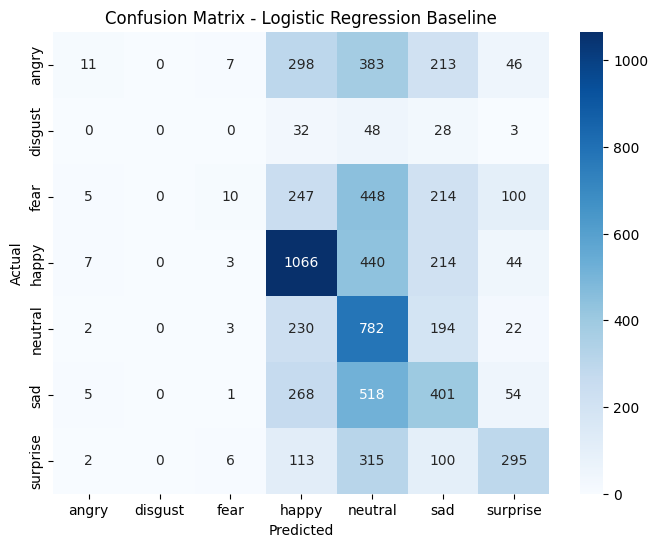

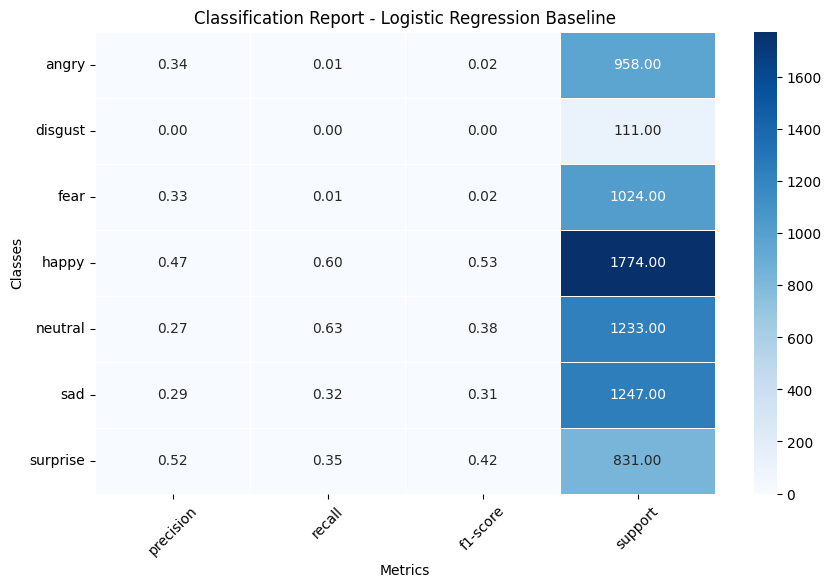

Test Accuracy: 0.3573
F1 Score: 0.3033
Sensitivity (Recall): 0.3573


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score
import pandas as pd

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset directories
train_dir = r"C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train"
test_dir = r"C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test"

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(),        # Ensure images are grayscale
    transforms.Resize((48, 48)),   # Resize to (48, 48) (should already be this size)
    transforms.ToTensor(),         # Convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to a vector (48x48 = 2304)
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
input_dim = 48 * 48  # 2304 pixels per image
num_classes = 7  # Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise
model = LogisticRegressionModel(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Generate Classification Report
class_names = train_dataset.classes
class_report = classification_report(all_labels, all_preds, target_names=class_names)

# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression Baseline")
plt.show()

# Compute F1 Score and Sensitivity (Recall)
f1 = f1_score(all_labels, all_preds, average='weighted')  # Weighted F1 Score
sensitivity = recall_score(all_labels, all_preds, average='weighted')  # Sensitivity (Recall)

# Generate Classification Report as a dictionary
class_report_dict = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True, zero_division=0)

# Convert to DataFrame
class_report_df = pd.DataFrame(class_report_dict).T
class_report_df = class_report_df.round(4)  # Round values for better readability

# Plot Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-3, :], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Classification Report - Logistic Regression Baseline")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print Results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")

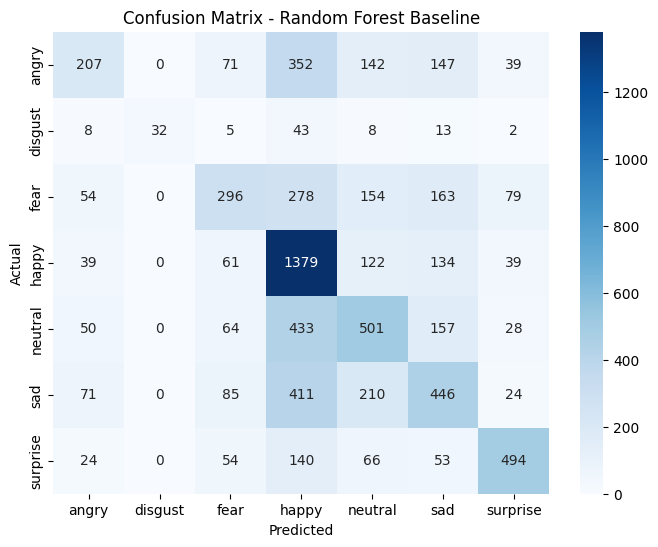

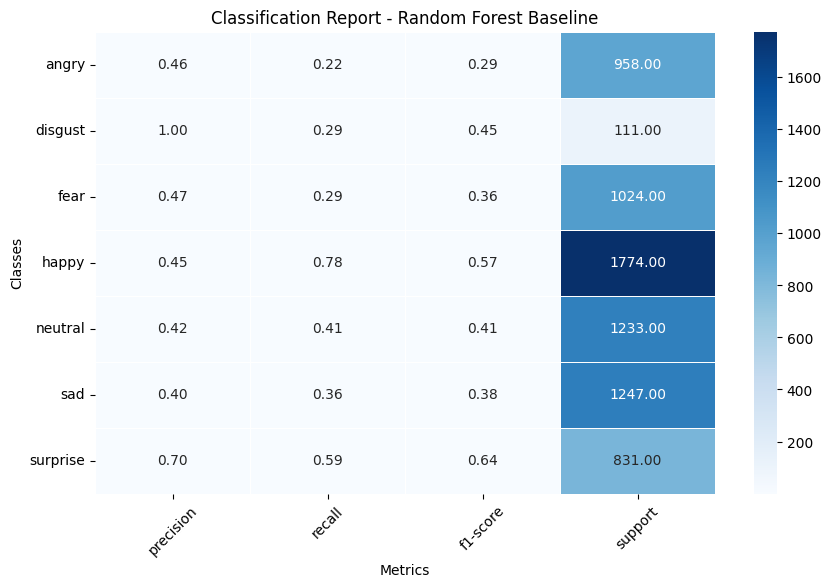

Test Accuracy: 0.4674
F1 Score: 0.4495
Sensitivity (Recall): 0.4674


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score

# Define dataset directories
train_dir = r"C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train"
test_dir = r"C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test"

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(),        # Ensure images are grayscale
    transforms.Resize((48, 48)),   # Resize to (48, 48) (should already be this size)
    transforms.ToTensor(),         # Convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to a vector (48x48 = 2304)
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert dataset to NumPy arrays
def dataset_to_numpy(dataset):
    X = []
    y = []
    for img, label in dataset:
        X.append(img.numpy())  # Convert tensor to NumPy array
        y.append(label)
    return np.array(X), np.array(y)

# Get train and test data as NumPy arrays
X_train, y_train = dataset_to_numpy(train_dataset)
X_test, y_test = dataset_to_numpy(test_dataset)

# Flatten input features (48x48 → 2304)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Baseline")
plt.show()

# Compute F1 Score and Sensitivity (Recall)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 Score
sensitivity = recall_score(y_test, y_pred, average='weighted')  # Sensitivity (Recall)

# Generate Classification Report as a Dictionary
class_names = train_dataset.classes
class_report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame
class_report_df = pd.DataFrame(class_report_dict).T
class_report_df = class_report_df.round(4)  # Round values for better readability

# Plot Classification Report as a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-3, :], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Classification Report - Random Forest Baseline")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print Results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")

In [53]:
# Data Processing
import cv2
import os
import numpy as np
import concurrent.futures

# Define paths
original_train_path = os.path.join(path, "train")  # Original training data
original_test_path = os.path.join(path, "test")  # Original test data
processed_data_path = os.path.join(path, "processed_data")  # New folder for processed images
processed_train_path = os.path.join(processed_data_path, "train")  # Processed training images
processed_test_path = os.path.join(processed_data_path, "test")  # Processed test images

# Create directories
os.makedirs(processed_train_path, exist_ok=True)
os.makedirs(processed_test_path, exist_ok=True)

# Define preprocessing functions
def increase_sharpness_cv2(img, amount=1.2, sigma=1.0):
    blurred = cv2.GaussianBlur(img, (0, 0), sigma)
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    return sharpened

# Process a single image (without augmentation)
def process_image(img_path, output_class_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # Skip corrupt images

    # Apply sharpness enhancement
    img_processed = increase_sharpness_cv2(img, amount=1.2, sigma=1.0)

    # Save processed image
    base_name = os.path.basename(img_path)
    cv2.imwrite(os.path.join(output_class_path, base_name), img_processed, [cv2.IMWRITE_JPEG_QUALITY, 95])

# Process all images in a given folder (without augmentation)
def process_folder(original_folder, output_folder):
    for class_label in os.listdir(original_folder):
        class_path = os.path.join(original_folder, class_label)
        if not os.path.isdir(class_path):
            continue

        output_class_path = os.path.join(output_folder, class_label)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            process_image(img_path, output_class_path)

# Process train and test sets in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.submit(process_folder, original_train_path, processed_train_path)
    executor.submit(process_folder, original_test_path, processed_test_path)

print(f"Processed images saved in {processed_data_path}")

Processed images saved in C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\processed_data


In [57]:
# Data Partitioning
import shutil
from sklearn.model_selection import train_test_split

# Define paths for train/val split
split_data_path = os.path.join(processed_data_path, "split_data")
split_train_path = os.path.join(split_data_path, "train")  # Final training set
split_val_path = os.path.join(split_data_path, "val")  # Validation set

# Create directories
os.makedirs(split_train_path, exist_ok=True)
os.makedirs(split_val_path, exist_ok=True)

# Function to split train data into train/val
def split_train_validation(train_path, val_ratio=0.2):
    for emotion in os.listdir(train_path):  # Loop through each class
        emotion_path = os.path.join(train_path, emotion)

        if os.path.isdir(emotion_path):  # Ensure it's a folder
            images = os.listdir(emotion_path)  # Get all images
            train_files, val_files = train_test_split(images, test_size=val_ratio, random_state=42)

            # Create class directories in train/val folders
            os.makedirs(os.path.join(split_train_path, emotion), exist_ok=True)
            os.makedirs(os.path.join(split_val_path, emotion), exist_ok=True)

            # Move files to their respective folders
            for file in train_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(split_train_path, emotion, file))
            for file in val_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(split_val_path, emotion, file))

split_train_validation(processed_train_path, val_ratio=0.2)

print(f"Splitting complete! New dataset structure:")
print(f"- Training: {split_train_path}")
print(f"- Validation: {split_val_path}")

Splitting complete! New dataset structure:
- Training: C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\processed_data\split_data\train
- Validation: C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\processed_data\split_data\val


In [59]:
# Data augmentation
import os
import cv2
import numpy as np
import random
from scipy.ndimage import gaussian_filter

# Function to apply horizontal flip (randomly)
def horizontal_flip(img):
    if random.random() < 0.5:  # 50% chance to flip
        return np.fliplr(img)
    return img

# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.5):
    if random.random() < 0.5:  # 50% chance of applying noise
        noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        img = cv2.add(img, noise)  # Apply noise
    return np.clip(img, 0, 255)

# Function to apply random rotation
def random_rotation(img, angle_range=20):
    if random.random() < 0.5:
        angle = random.uniform(-angle_range, angle_range)
        h, w = img.shape[:2]
        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
        img = cv2.warpAffine(img, M, (w, h))
    return img

# Function to adjust brightness
def random_brightness(img, factor_range=(0.6, 1.4)):
    if random.random() < 0.5:
        factor = random.uniform(*factor_range)
        img = np.clip(img * factor, 0, 255).astype(np.uint8)
    return img

# Function to apply elastic transformation
def elastic_transform(img, alpha=20, sigma=4):
    if random.random() < 0.4:
        random_state = np.random.RandomState(None)
        shape = img.shape
        dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
        dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
        x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))
        img = cv2.remap(img, indices[1].astype(np.float32), indices[0].astype(np.float32), interpolation=cv2.INTER_LINEAR)
    return img

# Function to apply random cropping safely
def random_crop(img, crop_size=40):
    if random.random() < 0.4:
        h, w = img.shape[:2]
        # Ensure crop_size does not exceed image dimensions
        crop_size = min(crop_size, h, w)

        # Set start positions so that the crop is within the image
        start_x = 0 if w == crop_size else random.randint(0, w - crop_size)
        start_y = 0 if h == crop_size else random.randint(0, h - crop_size)

        cropped = img[start_y:start_y+crop_size, start_x:start_x+crop_size]
        # Check if cropping produced a valid image, if not, skip cropping
        if cropped.size == 0:
            return img
        img = cv2.resize(cropped, (w, h))  # Resize back to original size

    return img

# Process a single image with augmentations
def process_image_with_aug(img_path, num_aug=3):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # Skip corrupt images

    base_name, ext = os.path.splitext(os.path.basename(img_path))
    folder_path = os.path.dirname(img_path)

    for i in range(num_aug):
        img_processed = img.copy()
        img_processed = horizontal_flip(img_processed)
        img_processed = add_gaussian_noise(img_processed, mean=0, sigma=0.5)
        img_processed = random_rotation(img_processed)
        img_processed = random_brightness(img_processed)
        img_processed = elastic_transform(img_processed)
        img_processed = random_crop(img_processed)

        # Save with a modified filename (so original is not overwritten)
        new_filename = f"{base_name}_aug{i}{ext}"
        new_path = os.path.join(folder_path, new_filename)
        cv2.imwrite(new_path, img_processed, [cv2.IMWRITE_JPEG_QUALITY, 95])

# Define target number of images per class (matching the 'happy' class size)
TARGET_SAMPLES = 5772

# Current dataset distribution before augmentation
class_distribution = {
    "angry": 3196,
    "disgust": 348,
    "fear": 3277,
    "happy": 5772,  # Already balanced, no augmentation needed
    "neutral": 3972,
    "sad": 3864,
    "surprise": 2536
}

# Process folder with different augmentation rates per class
def process_folder_with_aug(original_folder):
    for class_label, current_samples in class_distribution.items():
        class_path = os.path.join(original_folder, class_label)
        if not os.path.isdir(class_path):
            continue

        # Calculate the number of augmentations needed per image
        if current_samples < TARGET_SAMPLES:
            num_aug = max((TARGET_SAMPLES - current_samples) // current_samples, 1)  # Ensure at least 1 augmentation per image
        else:
            num_aug = 0  # No augmentation needed for the 'happy' class

        print(f"Class: {class_label} | Current Samples: {current_samples} | Augmenting {num_aug}x per image")

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Only apply augmentation if needed
            if num_aug > 0:
                process_image_with_aug(img_path, num_aug)

# Call the function
process_folder_with_aug(split_train_path)

print(f"Processed images with augmentation saved in {split_train_path}")

Class: angry | Current Samples: 3196 | Augmenting 1x per image
Class: disgust | Current Samples: 348 | Augmenting 15x per image
Class: fear | Current Samples: 3277 | Augmenting 1x per image
Class: happy | Current Samples: 5772 | Augmenting 0x per image
Class: neutral | Current Samples: 3972 | Augmenting 1x per image
Class: sad | Current Samples: 3864 | Augmenting 1x per image
Class: surprise | Current Samples: 2536 | Augmenting 1x per image
Processed images with augmentation saved in C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\processed_data\split_data\train


In [60]:
# Count processed dataset images
from collections import defaultdict
def count_samples(dataset_path):
    """
    Count the number of files (images) in each subfolder of 'train' and 'test'.
    Returns two dictionaries: one for train and one for test.
    """
    train_counts = defaultdict(int)
    sum_train = 0

    split_path = dataset_path

    if os.path.exists(split_path):  # Check if the folder exists
        for root, dirs, files in os.walk(split_path):
            folder_name = os.path.basename(root)  # Get the emotion folder name
            if root != split_path:  # Exclude 'train' or 'test' root itself
                    train_counts[folder_name] = len(files)
                    sum_train += len(files)

    else:
        print(f"Folder '{split_path}' does not exist.")

    print(f"Total training samples: {sum_train}")
    return train_counts

# Get file counts for train and test
train_counts = count_samples(split_train_path)

# Print the results
for exp in train_counts:
  print(f"{exp}: {train_counts[exp]}")

Total training samples: 45030
angry: 6392
disgust: 5568
fear: 6554
happy: 5772
neutral: 7944
sad: 7728
surprise: 5072


Training on cuda
Epoch 1/20 | Train Loss: 1.8326 | Val Loss: 2.5755
Epoch 2/20 | Train Loss: 1.5301 | Val Loss: 2.2942
Epoch 3/20 | Train Loss: 1.4025 | Val Loss: 2.0832
Epoch 4/20 | Train Loss: 1.3251 | Val Loss: 2.0148
Epoch 5/20 | Train Loss: 1.2735 | Val Loss: 2.1418
Epoch 6/20 | Train Loss: 1.2249 | Val Loss: 1.8989
Epoch 7/20 | Train Loss: 1.1769 | Val Loss: 2.0001
Epoch 8/20 | Train Loss: 1.1406 | Val Loss: 1.8602
Epoch 9/20 | Train Loss: 1.1068 | Val Loss: 1.9338
Epoch 10/20 | Train Loss: 1.0674 | Val Loss: 1.9277
Epoch 11/20 | Train Loss: 1.0335 | Val Loss: 1.7743
Epoch 12/20 | Train Loss: 0.9997 | Val Loss: 1.6310
Epoch 13/20 | Train Loss: 0.9701 | Val Loss: 1.7176
Epoch 14/20 | Train Loss: 0.9388 | Val Loss: 1.6823
Epoch 15/20 | Train Loss: 0.9086 | Val Loss: 1.6186
Epoch 16/20 | Train Loss: 0.8753 | Val Loss: 1.6106
Epoch 17/20 | Train Loss: 0.8488 | Val Loss: 1.6214
Epoch 18/20 | Train Loss: 0.8117 | Val Loss: 1.5162
Epoch 19/20 | Train Loss: 0.7863 | Val Loss: 1.5538
Epoc

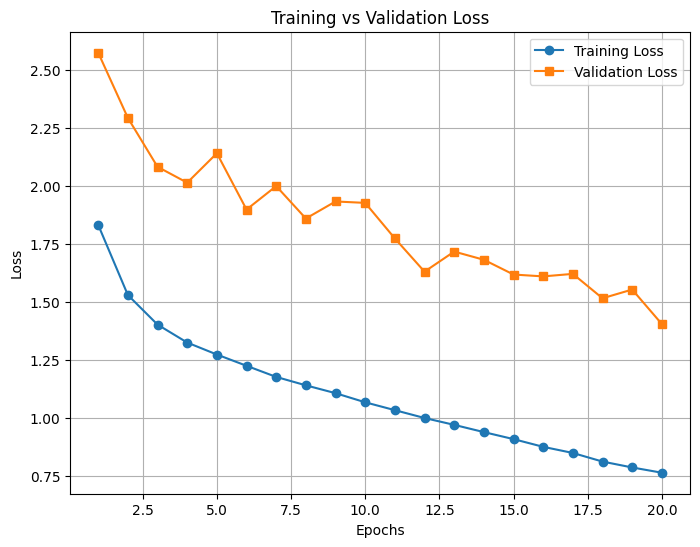

Test Accuracy: 0.4915
Test F1 Score: 0.4960
Test Sensitivity (Recall): 0.4915


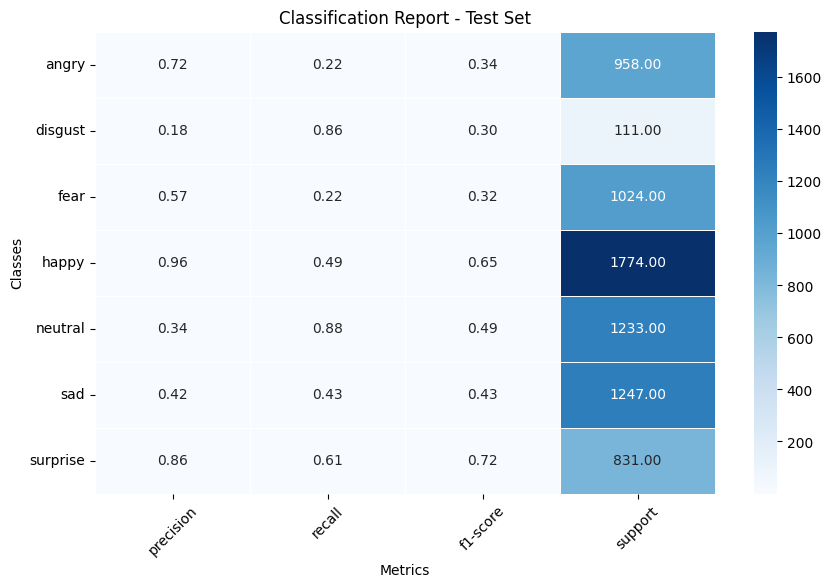

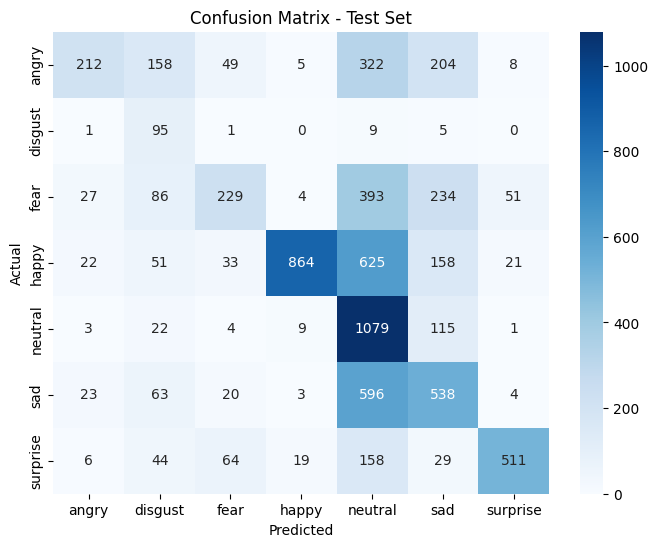

In [61]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Define dataset paths
processed_train_path = split_train_path
processed_val_path = split_val_path
processed_test_path = r'C:\Users\smuht\.cache\kagglehub\datasets\msambare\fer2013\versions\1\processed_data\test'

# Image Transformations
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

# Load Datasets
train_set = datasets.ImageFolder(root=processed_train_path, transform=transform)
val_set   = datasets.ImageFolder(root=processed_val_path, transform=transform)
test_set  = datasets.ImageFolder(root=processed_test_path, transform=transform)

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Define CNN Model
class FER2013_CNN(nn.Module):
    def __init__(self):
        super(FER2013_CNN, self).__init__()
        self.name = "fer2013_cnn"

        # Convolutional Layers with Batch Normalization
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.bn1   = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2   = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3   = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4   = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5   = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6   = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn7   = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.bn8   = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * 3 * 3, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 7)

        # Dropout Layers
        self.conv_dropout = nn.Dropout(0.3)
        self.fc_dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.conv_dropout(F.relu(self.bn2(self.conv2(x))))
        x = self.pool1(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.conv_dropout(F.relu(self.bn4(self.conv4(x))))
        x = self.pool2(x)

        x = F.relu(self.bn5(self.conv5(x)))
        x = self.conv_dropout(F.relu(self.bn6(self.conv6(x))))
        x = self.pool3(x)

        x = F.relu(self.bn7(self.conv7(x)))
        x = self.conv_dropout(F.relu(self.bn8(self.conv8(x))))
        x = self.pool4(x)

        x = x.view(x.size(0), -1)
        x = self.fc_dropout(F.relu(self.bn_fc1(self.fc1(x))))
        x = self.fc2(x)
        return x

# Train Model Function
def train_cnn(model, num_epochs=20, learning_rate=0.0001, checkpoint_freq=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_loss, val_loss = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_loss.append(avg_train_loss)

        # Evaluate on validation set
        model.eval()
        running_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_loss.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        if (epoch + 1) % checkpoint_freq == 0:
            torch.save(model.state_dict(), f"fer2013_cnn_epoch{epoch+1}.pth")

    torch.save(model.state_dict(), "fer2013_cnn_final.pth")

    # Plot Training vs Validation Loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs+1), train_loss, label="Training Loss", marker='o')
    plt.plot(range(1, num_epochs+1), val_loss, label="Validation Loss", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.grid(True)
    plt.show()

# Train the model
model = FER2013_CNN()
train_cnn(model, num_epochs=20, learning_rate=0.0001)

# Load the final model
model.load_state_dict(torch.load("fer2013_cnn_final.pth"))
model.to(device)
model.eval()

# -------------------------------
# Evaluate on Test Set
# -------------------------------
y_true_test, y_pred_test = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

# Compute Test Metrics
accuracy_test = accuracy_score(y_true_test, y_pred_test)
f1_test = f1_score(y_true_test, y_pred_test, average='weighted')
sensitivity_test = recall_score(y_true_test, y_pred_test, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test Sensitivity (Recall): {sensitivity_test:.4f}")

# Generate Classification Report for Test Set
class_names = test_set.classes
class_report_dict_test = classification_report(y_true_test, y_pred_test, target_names=class_names, output_dict=True)
class_report_df_test = pd.DataFrame(class_report_dict_test).T.round(4)

# Plot Classification Report as a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df_test.iloc[:-3, :], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Classification Report - Test Set")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Plot Confusion Matrix for Test Set
cm_test = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

C:\Users\smuht\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 | Train Loss: 1.9099 | Val Loss: 2.9250
Epoch 2/50 | Train Loss: 1.6791 | Val Loss: 2.8526
Epoch 3/50 | Train Loss: 1.5294 | Val Loss: 2.7792
Epoch 4/50 | Train Loss: 1.4345 | Val Loss: 2.7248
Epoch 5/50 | Train Loss: 1.3660 | Val Loss: 2.3808
Epoch 6/50 | Train Loss: 1.3113 | Val Loss: 2.5084
Epoch 7/50 | Train Loss: 1.2652 | Val Loss: 2.3239
Epoch 8/50 | Train Loss: 1.2237 | Val Loss: 2.2392
Epoch 9/50 | Train Loss: 1.1880 | Val Loss: 2.1933
Epoch 10/50 | Train Loss: 1.1510 | Val Loss: 2.2289
Epoch 11/50 | Train Loss: 1.1163 | Val Loss: 2.1066
Epoch 12/50 | Train Loss: 1.0909 | Val Loss: 2.3226
Epoch 13/50 | Train Loss: 1.0565 | Val Loss: 2.0523
Epoch 14/50 | Train Loss: 1.0311 | Val Loss: 2.2938
Epoch 15/50 | Train Loss: 0.9980 | Val Loss: 2.1858
Epoch 16/50 | Train Loss: 0.9746 | Val Loss: 2.0953
Epoch 17/50 | Train Loss: 0.9483 | Val Loss: 2.1602
Epoch 18/50 | Train Loss: 0.8727 | Val Loss: 2.0418
Epoch 19/50 | Train Loss: 0.8504 | Val Loss: 2.1227
Epoch 20/50 | Train L

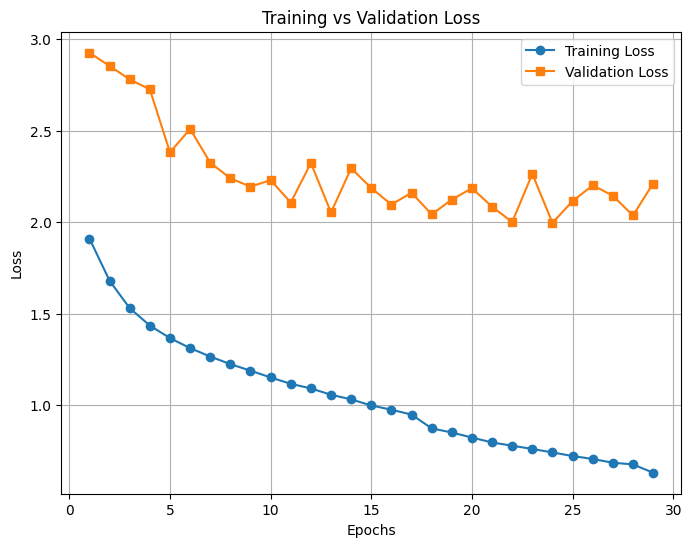

Test Accuracy: 0.4915
Test F1 Score: 0.4960
Test Sensitivity (Recall): 0.4915


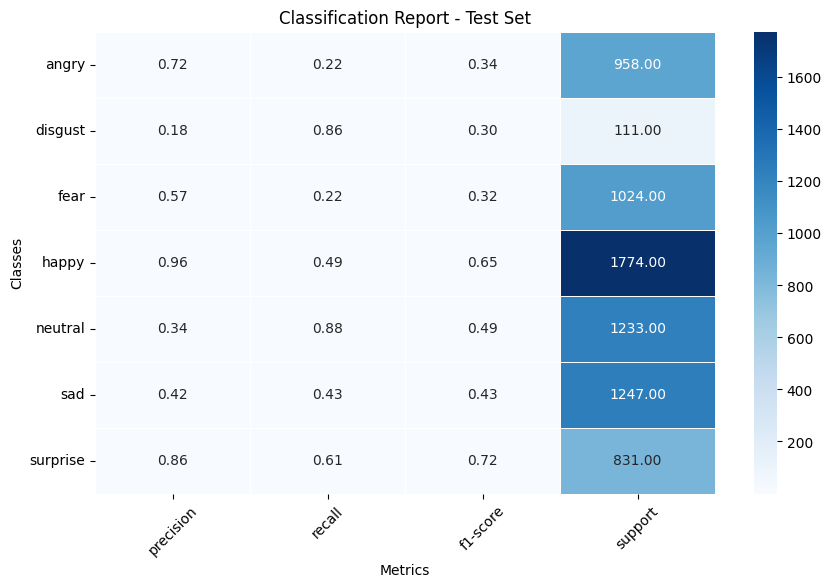

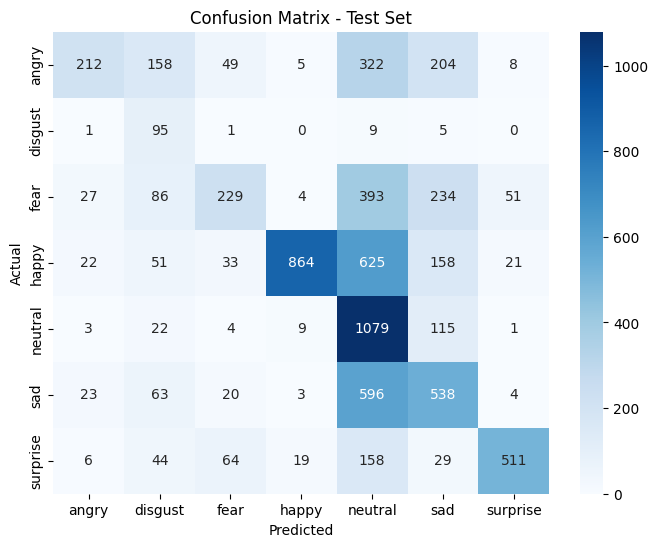

In [63]:
# Hyper-parameter Tuning
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Modify training function to include ReduceLROnPlateau and Early Stopping
def train_cnn(model, num_epochs=30, learning_rate=0.00005, patience=5, checkpoint_freq=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # Still keeping weight decay
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)  # Reduce LR on plateau

    train_loss, val_loss = [], []
    best_val_loss = float("inf")
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_loss.append(avg_train_loss)

        # Evaluate on validation set
        model.eval()
        running_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_loss.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        # Learning rate scheduling
        scheduler.step(avg_val_loss)

        # Early stopping condition
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), "fer2013_cnn_best.pth")  # Save best model
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break  # Stop training if no improvement for 'patience' epochs

        if (epoch + 1) % checkpoint_freq == 0:
            torch.save(model.state_dict(), f"fer2013_cnn_epoch{epoch+1}.pth")

    # Load the best model
    model.load_state_dict(torch.load("fer2013_cnn_best.pth"))

    # Plot Training vs Validation Loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_loss)+1), train_loss, label="Training Loss", marker='o')
    plt.plot(range(1, len(val_loss)+1), val_loss, label="Validation Loss", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.grid(True)
    plt.show()

# Train the model
model = FER2013_CNN()
train_cnn(model, num_epochs=50, learning_rate=0.00005)

# Load the final model
model.load_state_dict(torch.load("fer2013_cnn_final.pth"))
model.to(device)
model.eval()

# -------------------------------
# Evaluate on Test Set
# -------------------------------
y_true_test, y_pred_test = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

# Compute Test Metrics
accuracy_test = accuracy_score(y_true_test, y_pred_test)
f1_test = f1_score(y_true_test, y_pred_test, average='weighted')
sensitivity_test = recall_score(y_true_test, y_pred_test, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test Sensitivity (Recall): {sensitivity_test:.4f}")

# Generate Classification Report for Test Set
class_names = test_set.classes
class_report_dict_test = classification_report(y_true_test, y_pred_test, target_names=class_names, output_dict=True)
class_report_df_test = pd.DataFrame(class_report_dict_test).T.round(4)

# Plot Classification Report as a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df_test.iloc[:-3, :], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Classification Report - Test Set")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Plot Confusion Matrix for Test Set
cm_test = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()